<a href="https://colab.research.google.com/github/woodstone10/data-collection/blob/main/NAVER_Search_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAVER Search API Service (LG전자 오브제콜렉션)

https://developers.naver.com/main/ (*Need Registration for Open API usage)

- News
- Knowledge-iN
- Blog
- Shopping

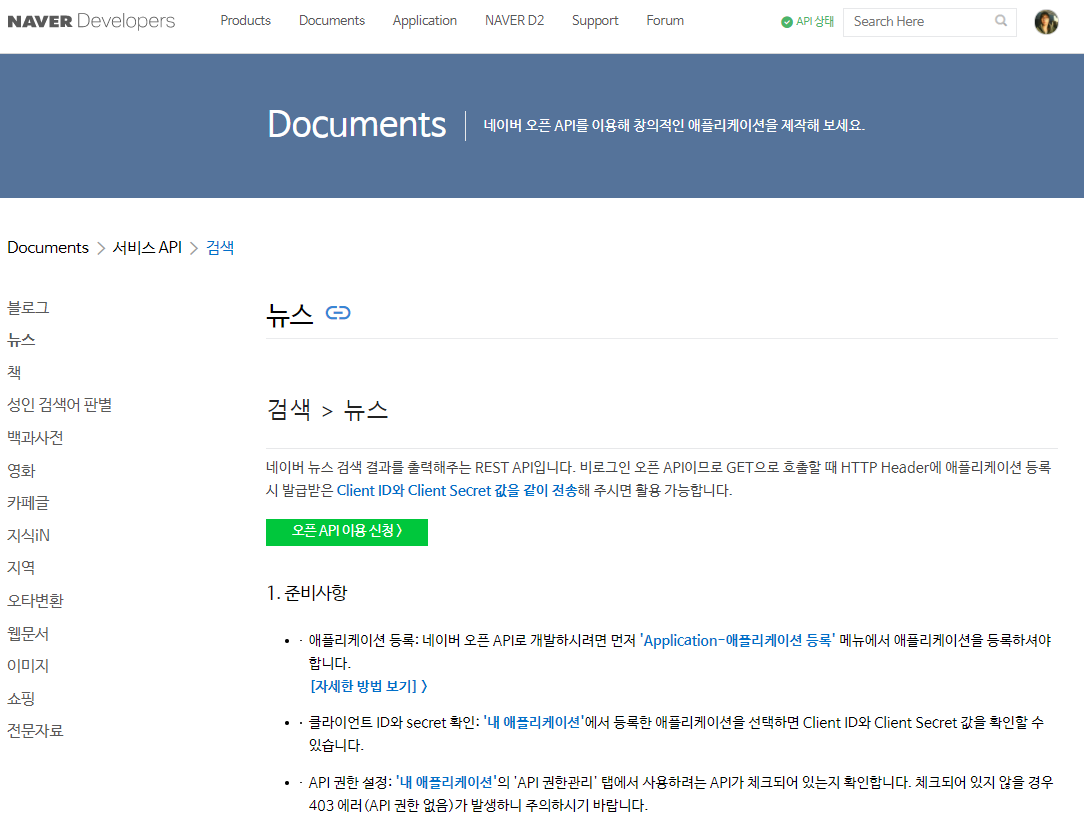


## Guide version:

https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8


In [ ]:
import os
import sys
import urllib.request
client_id = "4LDm8OiCb814yDjLsbE8"
client_secret = "ufXCmNybyU"
encText = urllib.parse.quote("LG전자 오브제콜렉션")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)


{
"lastBuildDate": "Sat, 17 Apr 2021 15:53:50 +0900",
"total": 72,
"start": 1,
"display": 10,
"items": [
{
"title": "이벤트) <b>LG전자 오브제콜렉션</b> 스타벅스 이벤트",
"link": "https:\/\/blog.naver.com\/msl1989?Redirect=Log&logNo=222303489164",
"description": "<b>LG</b>라니 믿을 수도 있구요. 그럼 내용 공유 드릴게요. ⠀ * 참여 방법 ① <b>LG전자 오브제</b>컬렉션으로 완성한 인테리어 중 가장 마음에 드는 인테리어 선택해 캡쳐하기 ② 화면을 캡쳐 후 #<b>오브제</b>컬렉션... ",
"bloggername": "심심한 여인네의 심심한 세상",
"bloggerlink": "https://blog.naver.com/msl1989",
"postdate": "20210409"

},
{
"title": "[혼수가전]<b>LG전자</b>베스트샵... 혼수가전 졸업!(feat.<b>오브제</b>)",
"link": "https:\/\/blog.naver.com\/manbokim90?Redirect=Log&logNo=222286531365",
"description": "#혼수가전 #<b>LG전자</b>혼수 #<b>오브제</b>컬렉션 #<b>LG</b>베스트샵평촌본점 #<b>LG</b>가전후기 #혼수가전졸업 [ 결혼준비 ㅣ... 영롱한 <b>오브제 콜렉션</b> *_* 처음에는 삼성 비스포크가 너무 예뻐보였는데 <b>LG</b> <b>오브제</b>가 훨씬 고오급지고... ",
"bloggername": "self storage ( ་ ⍸ ་ )",
"bloggerlink": "https://blog.naver.com/manbokim90",
"postdate": "20210325"

},
{
"title": "<b>LG</b>가전 <b>오브제 콜렉션</b>~",
"link": "h

## News modified version

In [ ]:
import os
import sys
import urllib.request

client_id = "4LDm8OiCb814yDjLsbE8" 
client_secret = "ufXCmNybyU"

#query = urllib.parse.quote(input("Search: "))
query = urllib.parse.quote("LG전자 오브제콜렉션")

idx = 0
display = 100
start = 1
end = 1000

import pandas as pd
import json
import re

news_df = pd.DataFrame(columns=("Title","Original Link","Link","Description", "Publish Date"))

for start_index in range(start, end, display):
  url = "https://openapi.naver.com/v1/search/news?query=" + query \
        + "&display=" + str(display) \
        + "&start=" + str(start_index)
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      originallink = items[item_index]['originallink']
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      pubDate = items[item_index]['pubDate']
      news_df.loc[idx] = [title, originallink, link, description, pubDate]
      idx += 1
  else:
    print("Error Code:" + rescode)

news_df

,Title,Original Link,Link,Description,Publish Date
0,"LG 오브제콜렉션, 세계 디자인상 '레드닷 어워드'·'iF 디자인 어워드' 수상",http://www.asiaa.co.kr/news/articleView.html?i...,http://www.asiaa.co.kr/news/articleView.html?i...,LG전자 '오브제콜렉션'이 세계 3대 디자인상 '레드닷 디자인 어워드'와 'iF 디...,"Wed, 14 Apr 2021 10:02:00 +0900"
1,"'비스포크 vs 오브제'… 삼성·LG, 가전 시장 공략 속도",http://biz.newdaily.co.kr/site/data/html/2021/...,http://biz.newdaily.co.kr/site/data/html/2021/...,"LG전자도 1분기 매출 18조8000억원, 영업이익 1조5000억원을 달성하며 분기...","Mon, 12 Apr 2021 05:39:00 +0900"
2,"&quot;차분한 컬러로 인테리어 완성&quot; LG전자, '오브제콜렉션 360˚...",http://www.asiaa.co.kr/news/articleView.html?i...,http://www.asiaa.co.kr/news/articleView.html?i...,[사진=LG전자] LG전자가 공기청정기에도 오브제콜렉션 라인업을 확대한 '오브제콜...,"Sun, 11 Apr 2021 10:01:00 +0900"
3,"LG전자, 2분기도 어닝서프라이즈?...증권가 “영업익 전년대비 두배”",http://theviewers.co.kr/View.aspx?No=1556275,http://theviewers.co.kr/View.aspx?No=1556275,뷰어스 이승아 기­자 올 1분기 어닝서프라이즈 기록한 LG전자가 2분기에도 전년동기...,"Fri, 09 Apr 2021 11:48:00 +0900"
4,'깜짝 실적' 공개한 LG전자...주가 따라갈 일만 남았다,http://www.babytimes.co.kr/news/articleView.ht...,http://www.babytimes.co.kr/news/articleView.ht...,LG전자가 지난 7일 1분기 실적을 발표했다. LG전자는 지난 1분기 매출액과 영업...,"Thu, 08 Apr 2021 14:38:00 +0900"
5,"LG전자, MC사업부 철수하고 실적까지 뒷받침-SK증권",https://daily.hankooki.com/lpage/finance/20210...,https://daily.hankooki.com/lpage/finance/20210...,SK증권은 8일 LG전자에 대해 올해 1분기 잠정실적이 시장 예상을 웃도는 서프라이...,"Thu, 08 Apr 2021 08:56:00 +0900"
6,"최대 실적 갈아치운 LG전자, 올해 '영업이익 4조' 사냥",http://news.mt.co.kr/mtview.php?no=20210407174...,https://news.naver.com/main/read.nhn?mode=LSD&...,LG전자가 1분기 최대 실적 기록을 갈아치웠다. 호실적을 이어가며 올해 처음으로 '...,"Thu, 08 Apr 2021 04:35:00 +0900"
7,"'롯데하이마트, LG전자와 학대피해 아동 위해', 기부 캠페인 열었다",http://www.whitepaper.co.kr/news/articleView.h...,http://www.whitepaper.co.kr/news/articleView.h...,"롯데하이마트 행사 기간 동안 에어컨, 냉장고, 세탁기, 공기청정기 등 LG전자 '오...","Wed, 07 Apr 2021 17:21:00 +0900"
8,"'롯데하이마트, LG전자와 학대피해 아동 위한', 기부 캠페인 열어 주목",http://www.newsfarm.co.kr/news/articleView.htm...,http://www.newsfarm.co.kr/news/articleView.htm...,"롯데하이마트 행사 기간 동안 에어컨, 냉장고, 세탁기, 공기청정기 등 LG전자 '오...","Wed, 07 Apr 2021 14:47:00 +0900"
9,"'롯데하이마트, LG전자와 학대피해 아동', 기부 캠페인 열었다",https://www.chuksannews.co.kr/news/article.htm...,https://www.chuksannews.co.kr/news/article.htm...,"롯데하이마트 행사 기간 동안 에어컨, 냉장고, 세탁기, 공기청정기 등 LG전자 ‘오...","Wed, 07 Apr 2021 14:31:00 +0900"


In [ ]:
news_df['Description'][0]

"LG전자 '오브제콜렉션'이 세계 3대 디자인상 '레드닷 디자인 어워드'와 'iF 디자인 어워드'를 연이어 수상했다. 사진 왼쪽부터 LG 오브제콜렉션 청소기, 스타일러, 워시타워, 휘센 타워, 냉장고 등이 있다. [사진=LG전자]... "

## Knowledge-iN modified version

In [ ]:
import os
import sys
import urllib.request

client_id = "4LDm8OiCb814yDjLsbE8" 
client_secret = "ufXCmNybyU"

query = urllib.parse.quote("LG전자 오브제콜렉션")

idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

import pandas as pd
import json
import re

kin_df = pd.DataFrame(columns=("Title","Link","Description"))

for start_index in range(start, end, display):
  url = "https://openapi.naver.com/v1/search/kin?query=" + query \
        + "&display=" + str(display) \
        + "&start=" + str(start_index) \
        + "&sort=" + sort
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      kin_df.loc[idx] = [title, link, description]
      idx += 1
  else:
    print("Error Code:" + rescode)

kin_df

,Title,Link,Description
0,슬림한 라인의 맞춤정장?,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,슬림~ 하게 입고싶은데 맞춤으로 하는게 더 잘나온다고 들어서요 ^^ 아시는곳 있으면...
1,봄 맞춤정장 하려면!!,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,제가 봄 정장이 하나도 없어서 한벌 하려고 하는데 어디가 좋을까요?? 남성 맞춤정장...
2,세련된 맞춤정장 어디가 좋을까요!!,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,정장 가지고 있는게 전부 3버튼이라서 2버튼 기본 정장을 하나 맞출려고 하는데......
3,상견례때 입을 남자정장 맞춤하는곳은?,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,양가 상견례가 있어 입을 정장을 맞춤하려합니다. 어디가 젤 잘하나요? 남성 맞춤정장...
4,직장 새내기인데요 혹시 남자 정장 맞춤 하려는데~,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,이제 막 직장 생활 하게 된 남자입니다. 아무래도 처음 입는 정장을 입고 회사생활을...
5,곧 결혼을 하는데 양가아버님 정장맞춤이요~,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,예비신부인데 시아버님과 친아버지 정장맞춤 하려구요 깔끔하고 괜찮은 곳 추천 좀 해주...
6,남자 정장 맞춤 하는 곳 알려주세요~,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,약간 슬림하게 입는 편이라서요 정장 맞춤해 입으려구요 서울에 살구요 라인 예쁘게 하...
7,밝은색깔의 결혼예복을 맞춤하는곳....,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,결혼예복 남자정장을 밝은색깔로 하려고 합니다. 몸에 딱맞게 잘하는곳 추천해주세요. ...
8,남자친구 생일 선물로 맞춤 정장 어때요??,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,좀 있음 남친 생일인데요~.. 만난지 일년된 기념일이기도 하고~.. 겸사해서 맞춤 ...
9,남편 승진 기념 선물로 맞춤정장 해줄까 하는데??,https://kin.naver.com/qna/detail.nhn?d1id=20&d...,남편이 이번에 승진을 하게 되서요~^^ 기특해서 선물로 정장 한벌 맞춰줄까 하는데 ...


## Blog modified version

In [ ]:
import os
import sys
import urllib.request

client_id = "4LDm8OiCb814yDjLsbE8" 
client_secret = "ufXCmNybyU"

query = urllib.parse.quote("LG전자 오브제콜렉션")

idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

import pandas as pd
import json
import re

blog_df = pd.DataFrame(columns=("Title","Link","Description","Blogger Name","Blogger Link", "Post Date"))

for start_index in range(start, end, display):
  url = "https://openapi.naver.com/v1/search/blog?query=" + query \
        + "&display=" + str(display) \
        + "&start=" + str(start_index) \
        + "&sort=" + sort
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      post_date = items[item_index]['postdate']
      blog_df.loc[idx] = [title, link, description, blogger_name, blogger_link, post_date]
      idx += 1
  else:
    print("Error Code:" + rescode)

blog_df

,Title,Link,Description,Blogger Name,Blogger Link,Post Date
0,이벤트) LG전자 오브제콜렉션 스타벅스 이벤트,https://blog.naver.com/msl1989?Redirect=Log&lo...,LG라니 믿을 수도 있구요. 그럼 내용 공유 드릴게요. ⠀ * 참여 방법 ① LG전...,심심한 여인네의 심심한 세상,https://blog.naver.com/msl1989,20210409
1,[혼수가전]LG전자베스트샵... 혼수가전 졸업!(feat.오브제),https://blog.naver.com/manbokim90?Redirect=Log...,#혼수가전 #LG전자혼수 #오브제컬렉션 #LG베스트샵평촌본점 #LG가전후기 #혼수가...,self storage ( ་ ⍸ ་ ),https://blog.naver.com/manbokim90,20210325
2,LG가전 오브제 콜렉션~,https://blog.naver.com/naruto8282?Redirect=Log...,가전 콜렉션을 소개합니다~ 노크온이 되는 세미빌트인 냉장고!! 영롱한 자태!! 전자...,호호호호,https://blog.naver.com/naruto8282,20210408
3,눈물의 LG전자 냉장고 - 오브제로 변경 해야 되나??,https://blog.naver.com/48608486?Redirect=Log&l...,"전자제품을 구매하고 결제까지 다 끝냈고, 업체에서도 제품 주문까지 다 했다는 소리 ...",쿨시부부의 꿈꾸는 세계여행。,https://blog.naver.com/48608486,20201028
4,LG오브제 정수기 완벽한 주방 완성!,https://blog.naver.com/jeongsemi88?Redirect=Lo...,"LG오브제 콜렉션은 집에서 머무는 시간이 늘어난 요즘 시국에 맞추어, LG전자에서 ...",세미로운 생활,https://blog.naver.com/jeongsemi88,20210225
...,...,...,...,...,...,...
695,"[2021-02-24] 코스닥,코스피 52주 신고가(이름순)",https://blog.naver.com/banks?Redirect=Log&logN...,1층 아트리움에서는 LG 오브제 콜렉션과 삼성 비스포크 콜렉션을 소개하며 여러 프로...,블록장생,https://blog.naver.com/banks,20210224
696,"[2021-02-24] 코스피,코스닥 신고,신저가",https://blog.naver.com/banks?Redirect=Log&logN...,LG전자 오브제컬렉션과 삼성전자 비스포크컬렉션을 소개한다. 대표 상품으로 LG오브제...,블록장생,https://blog.naver.com/banks,20210224
697,불매운동,https://blog.naver.com/dla3000?Redirect=Log&lo...,▪ 불매 대상 - (주)LG가 30%이상 지분을 가진 세 개 회사 LG전자_서울시 ...,배고프다밥줘,https://blog.naver.com/dla3000,20210113
698,lg퓨어렌탈을 통해 LG정수기렌탈 하신후 사은품 챙기세여!!,https://blog.naver.com/niggernk?Redirect=Log&l...,"LG전자의 경우, 정말 다양한 가전제품들이 많이 있는데 심지어 내구성이나 디자인 또...",niggernk님의블로그,https://blog.naver.com/niggernk,20201224


## Shopping modified version

---

https://developers.naver.com/docs/serviceapi/search/shopping/shopping.md#%EC%87%BC%ED%95%91

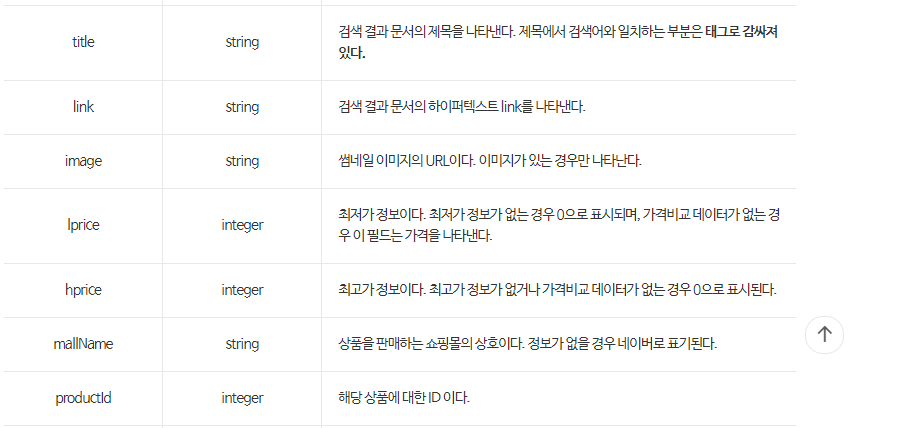

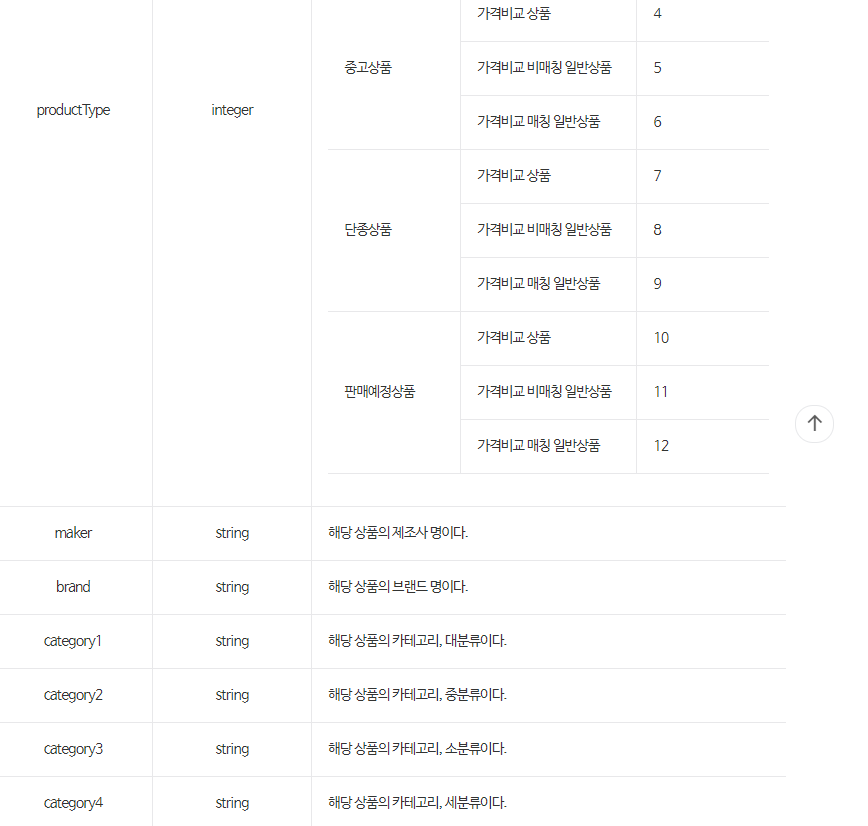

In [ ]:
import os
import sys
import urllib.request

client_id = "4LDm8OiCb814yDjLsbE8" 
client_secret = "ufXCmNybyU"

query = urllib.parse.quote("LG전자 오브제콜렉션")

idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

import pandas as pd
import json
import re

shop_df = pd.DataFrame(columns=("Title","Link","Image", 
                                "Low Price","High Price", "Mall Name",  
                                "Product ID", "Product Type", "Maker", "Brand", 
                                "Category-1", "Category-2",
                                "Category-3", "Category-4"))

for start_index in range(start, end, display):
  url = "https://openapi.naver.com/v1/search/shop?query=" + query \
        + "&display=" + str(display) \
        + "&start=" + str(start_index) \
        + "&sort=" + sort
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      image = items[item_index]['image']      
      lprice = items[item_index]['lprice']
      hprice = items[item_index]['hprice']
      mallName = items[item_index]['mallName']
      productId = items[item_index]['productId']
      productType = items[item_index]['productType']
      maker = items[item_index]['maker']
      brand = items[item_index]['brand']
      category1 = items[item_index]['category1']
      category2 = items[item_index]['category2']
      category3 = items[item_index]['category3']
      category4 = items[item_index]['category4']
            
      shop_df.loc[idx] = [title, link, image, lprice, hprice, 
                          mallName, productId, productType,
                          maker, brand,
                          category1, category2,
                          category3, category4]
      idx += 1
  else:
    print("Error Code:" + rescode)

shop_df

,Title,Link,Image,Low Price,High Price,Mall Name,Product ID,Product Type,Maker,Brand,Category-1,Category-2,Category-3,Category-4
0,LG전자 오브제컬렉션 M870GPB451,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_246801...,3314070,,네이버,24680195524,1,LG전자,오브제컬렉션,디지털/가전,주방가전,냉장고,양문형냉장고
1,LG전자 오브제컬렉션 M870GBB451,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_246802...,3350000,,네이버,24680229526,1,LG전자,오브제컬렉션,디지털/가전,주방가전,냉장고,양문형냉장고
2,LG전자 오브제컬렉션 X320GB,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_246207...,1071400,,네이버,24620719523,1,LG전자,오브제컬렉션,디지털/가전,주방가전,냉장고,일반형냉장고
3,LG전자 오브제컬렉션 M870SGS451,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_246802...,3587310,,네이버,24680229527,1,LG전자,오브제컬렉션,디지털/가전,주방가전,냉장고,양문형냉장고
4,LG전자 오브제컬렉션 M870SMM451,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_246804...,3610060,,네이버,24680456525,1,LG전자,오브제컬렉션,디지털/가전,주방가전,냉장고,양문형냉장고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LG전자 오브제컬렉션 X320SGS NS홈쇼핑,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_251922...,1719480,,NS홈쇼핑,25192289066,2,LG전자,LG전자,디지털/가전,주방가전,냉장고,일반형냉장고
996,LG전자 오브제컬렉션 Y320SGS NS홈쇼핑,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_251922...,1820680,,NS홈쇼핑,25192289933,2,LG전자,LG전자,디지털/가전,주방가전,냉장고,일반형냉장고
997,LG전자 오브제컬렉션 Y320GB NS홈쇼핑,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_251922...,1719480,,NS홈쇼핑,25192289934,2,LG전자,LG전자,디지털/가전,주방가전,냉장고,일반형냉장고
998,LG전자 오브제컬렉션 Y320MMS NS홈쇼핑,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_251922...,1770080,,NS홈쇼핑,25192287810,2,LG전자,LG전자,디지털/가전,주방가전,냉장고,일반형냉장고
